In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fracdiff import fdiff
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
df = pd.read_csv('Datasets/Aggregated_household_energy.csv')
df.rename(columns={'Unnamed: 0': 'date', '1':'energy meter val'}, inplace=True)

/tmp/ipykernel_947/3465800744.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Datasets/Aggregated_household_energy.csv')


In [3]:
pd.to_datetime(df['date'])

df.replace(to_replace='mains', value = '200', inplace= True)
df.ffill(inplace = True)
df['energy meter val'] = pd.to_numeric(df['energy meter val'])
df.dropna(inplace = True)
df['date'] = pd.to_datetime(df['date'], utc=True)
df= df.set_index('date')
df.index = df.index.tz_convert(None)

In [7]:
df = df.resample('H').mean()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,energy meter val
date,
2015-07-04 22:00:00,143.130972
2015-07-04 23:00:00,137.715056
2015-07-05 00:00:00,96.905917
2015-07-05 01:00:00,158.304917
2015-07-05 02:00:00,81.829944
...,...
2015-12-05 17:00:00,128.000000
2015-12-05 18:00:00,128.000000
2015-12-05 19:00:00,128.000000


<Axes: xlabel='date'>

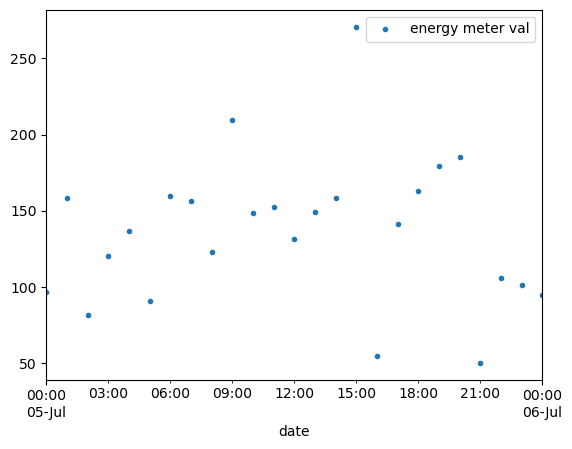

In [6]:
display(df)
df.ffill(inplace = True)
df.to_csv('Datasets/Household_processed_hourly.csv')
df['2015-07-05 00:00:00':'2015-07-06 00:00:00'].plot(style = '.')

In [7]:
# Testing stationarity of data
res = kpss(df['energy meter val'])
print(f"test statistic: {res[0]}")  
print(f"P-value: {res[1]}")
# Null hypothesis is rejected, data is non-stationary

test statistic: 1.904451004869043
P-value: 0.01


/home/doga/miniconda3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<Axes: xlabel='date'>

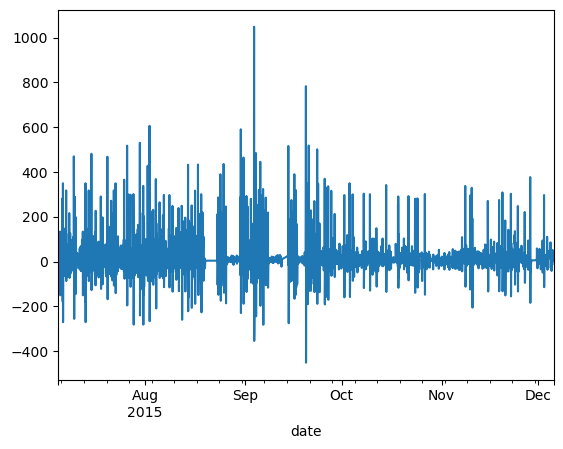

In [8]:
# Fractional Differentiation
df_diff = pd.Series(fdiff(df['energy meter val'], 0.6))
df_diff.index = df.index
df_diff.plot()

In [9]:
# Testing stationarity of data again
res = kpss(df_diff)
print(f"test statistic: {res[0]}")  
print(f"P-value: {res[1]}")
# Null hypothesis is accepted, data is stationary

test statistic: 0.8999813127229604
P-value: 0.01


/home/doga/miniconda3/envs/myenv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


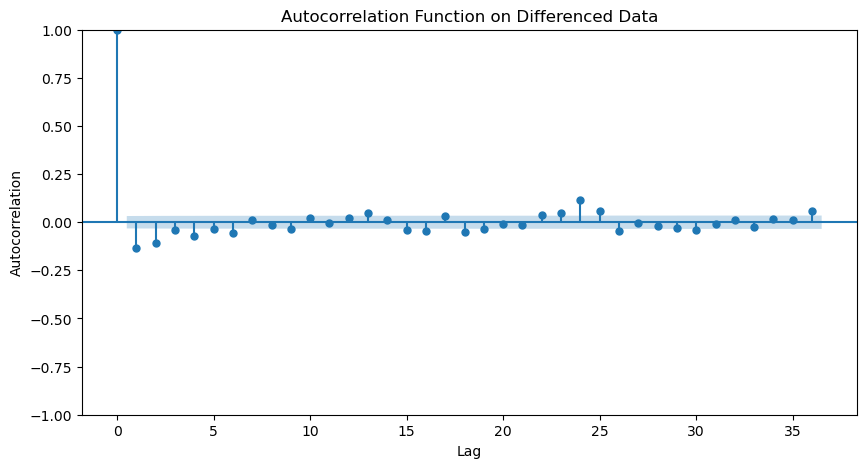

/home/doga/miniconda3/envs/myenv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


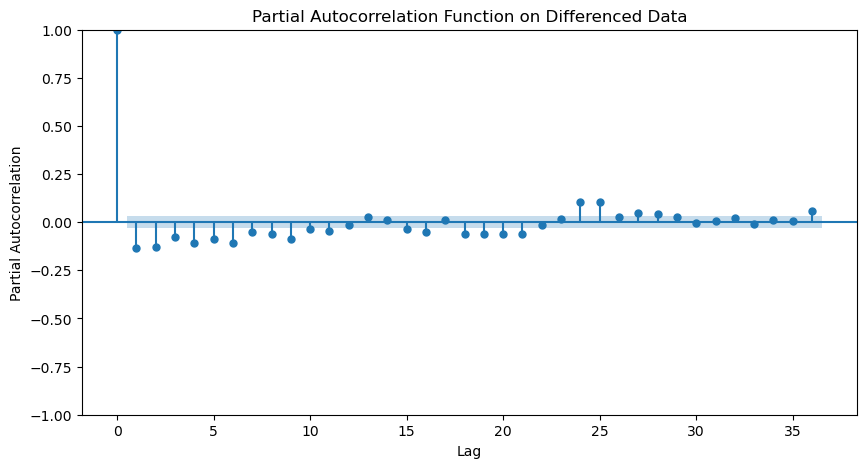

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_diff, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function on Differenced Data')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_diff, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function on Differenced Data')
plt.show()

*No Seasonality Can Be Observed Above*